# Statistical Techniques for Data Analysis - CA1

### Data Source

The source of the datasets is Kaggle, which provides public datasets for analysis. Two datasets generated from photovoltaic energy generation and temperature sensor data from two solar plants in India will be used. These datasets contain 34 days of generation data from the year 2020.

**Dataset names:** Plant_1_Generation_Data and Plant_2_Generation database.se.



### Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import binom, norm

# Data Preparation

### Dataset Reading

In [2]:
df1 = pd.read_csv('Plant_1_Generation_Data.csv')
df2 = pd.read_csv('Plant_2_Generation_Data.csv')

In [3]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOT

In [4]:
# Converting the 'DATE_TIME' column to datetime type
df1['DATE_TIME'] = pd.to_datetime(df1['DATE_TIME'])
df2['DATE_TIME'] = pd.to_datetime(df2['DATE_TIME'])

### Concatenating the two Data Sets

In [5]:
# axis=0 to concatenate along the rows (stack vertically)
# ignore_index=True to reset the indices of the resulting DataFrame
df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [6]:
df.shape

(136476, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATE_TIME    136476 non-null  datetime64[ns]
 1   PLANT_ID     136476 non-null  int64         
 2   SOURCE_KEY   136476 non-null  object        
 3   DC_POWER     136476 non-null  float64       
 4   AC_POWER     136476 non-null  float64       
 5   DAILY_YIELD  136476 non-null  float64       
 6   TOTAL_YIELD  136476 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 7.3+ MB


In [8]:
df.describe()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,136476,1.364760e+05,136476.000000,136476.000000,136476.000000,1.364760e+05
mean,2020-06-01 09:23:03.157478144,4.135497e+06,1708.541497,274.803511,3295.433783,3.303821e+08
min,2020-05-15 00:00:00,4.135001e+06,0.000000,0.000000,0.000000,0.000000e+00
25%,2020-05-23 23:00:00,4.135001e+06,0.000000,0.000000,28.321429,6.520020e+06
50%,2020-06-01 18:45:00,4.135001e+06,6.050000,3.506905,2834.803572,7.269333e+06
75%,2020-06-09 21:45:00,4.136001e+06,1155.788333,532.673333,5992.000000,2.826096e+08
max,2020-06-17 23:45:00,4.136001e+06,14471.125000,1410.950000,9873.000000,2.247916e+09
std,NaN,4.999862e+02,3222.181273,380.182569,3035.294425,6.085705e+08


### Checking for Null values

In [9]:
df.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

### Variable adjustment

In [10]:
# Splitting the 'DATE_TIME' column into two different columns
df['DATE'] = df['DATE_TIME'].dt.date
df['TIME'] = df['DATE_TIME'].dt.time

# Displaying the resulting DataFrame
print(df1)

                DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0     2020-05-15 00:00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1     2020-05-15 00:00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2     2020-05-15 00:00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3     2020-05-15 00:00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4     2020-05-15 00:00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                   ...       ...              ...       ...       ...   
68773 2020-06-17 23:45:00   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774 2020-06-17 23:45:00   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775 2020-06-17 23:45:00   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776 2020-06-17 23:45:00   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777 2020-06-17 23:45:00   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0            0.000    6259559.0  
1            0.000 

### Deleting DATE_TIME column

In [11]:
df = df.drop(columns=['DATE_TIME'])

### Changing the variable name

In [12]:
df = df.rename(columns={'SOURCE_KEY':'INVERTER'})

### Function imprimir_valores_unicos()
A function that prints the unique values of each variable.

In [13]:
def imprimir_valores_unicos(data_f):
    for coluna in data_f.columns:
        valores_unicos = data_f[coluna].unique()
        print(f"  {coluna} = {valores_unicos}")

imprimir_valores_unicos(df)

  PLANT_ID = [4135001 4136001]
  INVERTER = ['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb' 'ZnxXDlPa8U1GXgE'
 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry' 'iCRJl6heRkivqQ3'
 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV' 'sjndEbLyjtCKgGv'
 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG' 'zBIq5rxdHJRwDNY'
 'zVJPv84UY57bAof' 'YxYtjZvoooNbGkE' '4UPUqMRk7TRMgml' '81aHJ1q11NBPMrL'
 '9kRcWv60rDACzjR' 'Et9kgGMDl729KT4' 'IQ2d7wF4YD8zU1Q' 'LYwnQax7tkwH5Cb'
 'LlT2YUhhzqhg5Sw' 'Mx2yZCDsyf6DPfv' 'NgDl19wMapZy17u' 'PeE6FRyGXUgsRhN'
 'Qf4GUc1pJu5T6c6' 'Quc1TzYxW2pYoWX' 'V94E5Ben1TlhnDV' 'WcxssY2VbP4hApt'
 'mqwcsP2rE7J0TFp' 'oZ35aAeoifZaQzV' 'oZZkBaNadn6DNKz' 'q49J1IKaHRwDQnt'
 'rrq4fwE8jgrTyWY' 'vOuJvMaM2sgwLmb' 'xMbIugepa2P7lBB' 'xoJJ8DcxJEcupym']
  DC_POWER = [ 0.         37.14285714 53.5        ...  3.78        3.58
  3.90714286]
  AC_POWER = [0.         3.58571429 5.1625     ... 3.63333333 3.45

In [14]:
df

,PLANT_ID,INVERTER,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
0,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,00:00:00
1,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,00:00:00
2,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,00:00:00
3,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,00:00:00
4,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,00:00:00
...,...,...,...,...,...,...,...,...
136471,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0,2020-06-17,23:45:00
136472,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0,2020-06-17,23:45:00
136473,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0,2020-06-17,23:45:00
136474,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0,2020-06-17,23:45:00


### Duplicate Data

In [15]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: " , duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


# Task 1 – Data Analysis

### Analysis Variables

The analysis of the data below aims to understand the energy production patterns in photovoltaic systems and identify areas for improvement, as well as to assess the performance of the systems in the database.

In [16]:
# List of columns for calculating statistical values
columns_df= ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']

In [17]:
# Function to calculate the mean of variables and print them
def calculate_means(df, columns):
    for column in columns:
        mean = df[column].mean()
        print(f"Mean of {column}: {mean}")

# Function to calculate the median of variables and print them
def calculate_median(df, columns):
    for column in columns:
        median = df[column].median()
        print(f"Median of {column}: {median}")

# Function to calculate the mode of variables and print them
def calculate_mode(df, columns):
    for column in columns:
        mode = df[column].mode()
        print(f"Mode of {column}: {mode}")

# Function to calculate the standard deviation of variables and print them
def calculate_stdd(df, columns):
    for column in columns:
        stdd = df[column].std()
        print(f"Std Deviation of {column}: {stdd}")
        
# Function to calculate the IQR of variables and print them
def calculate_IQR(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        print(f"Intervalo Interquartil (IQR) of {column}: {IQR}")


In [18]:
calculate_means(df, columns_df)

Mean of DC_POWER: 1708.541496702347
Mean of AC_POWER: 274.80351054960653
Mean of DAILY_YIELD: 3295.433783295412
Mean of TOTAL_YIELD: 330382090.0684921


In [19]:
calculate_median(df, columns_df)

Median of DC_POWER: 6.05
Median of AC_POWER: 3.506904761904762
Median of DAILY_YIELD: 2834.8035715
Median of TOTAL_YIELD: 7269333.0


In [20]:
calculate_mode(df, columns_df)

Mode of DC_POWER: 0    0.0
Name: DC_POWER, dtype: float64
Mode of AC_POWER: 0    0.0
Name: AC_POWER, dtype: float64
Mode of DAILY_YIELD: 0    0.0
Name: DAILY_YIELD, dtype: float64
Mode of TOTAL_YIELD: 0    0.0
Name: TOTAL_YIELD, dtype: float64


In [21]:
calculate_stdd(df, columns_df)

Std Deviation of DC_POWER: 3222.1812733562097
Std Deviation of AC_POWER: 380.18256929405555
Std Deviation of DAILY_YIELD: 3035.294425108002
Std Deviation of TOTAL_YIELD: 608570527.4088567


In [22]:
calculate_IQR(df, columns_df)

Intervalo Interquartil (IQR) of DC_POWER: 1155.788333333333
Intervalo Interquartil (IQR) of AC_POWER: 532.6733333333333
Intervalo Interquartil (IQR) of DAILY_YIELD: 5963.67857143
Intervalo Interquartil (IQR) of TOTAL_YIELD: 276089566.0


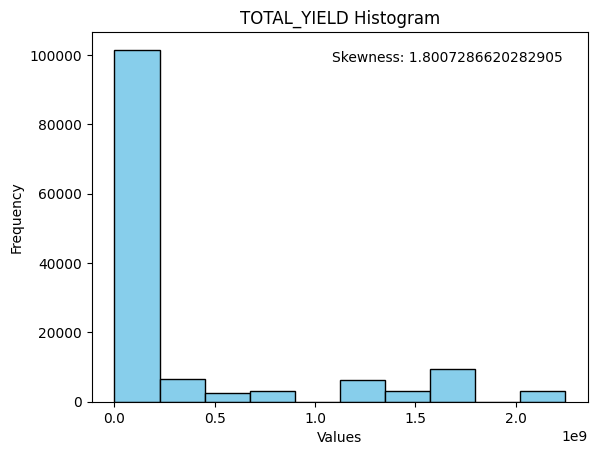

In [23]:
# Filtering values smaller than the lower limit
df_filtered = df[df['TOTAL_YIELD'] != 0.0]

# Calculating the skewness coefficient
skewness = df['TOTAL_YIELD'].skew()

# Plotting the histogram
plt.hist(df_filtered['TOTAL_YIELD'], bins=10, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('TOTAL_YIELD Histogram')

# Adding text with the value of the skewness coefficient
plt.text(0.95, 0.95, f'Skewness: {skewness}', ha='right', va='top', transform=plt.gca().transAxes)

# Displaying the histogram
plt.show()

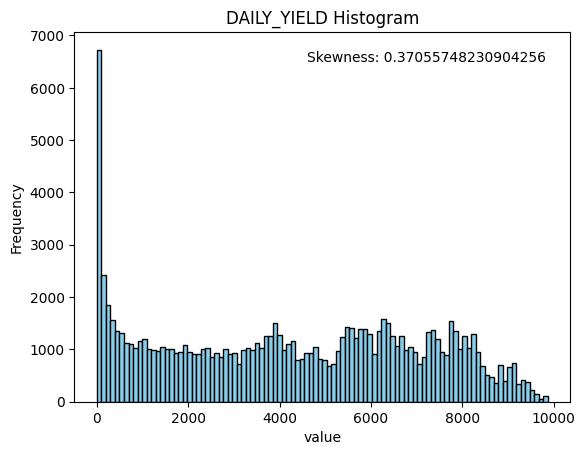

In [24]:
# Filtering values smaller than the lower limit
df_filtered = df[df['DAILY_YIELD'] != 0.0]

# Calculating the skewness coefficient
skewness = df['DAILY_YIELD'].skew()

# Plotting the histogram
plt.hist(df_filtered['DAILY_YIELD'], bins=100, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('value')
plt.ylabel('Frequency')
plt.title('DAILY_YIELD Histogram')

# Adding text with the value of the skewness coefficient
plt.text(0.95, 0.95, f'Skewness: {skewness}', ha='right', va='top', transform=plt.gca().transAxes)

# Displaying the histogram
plt.show()

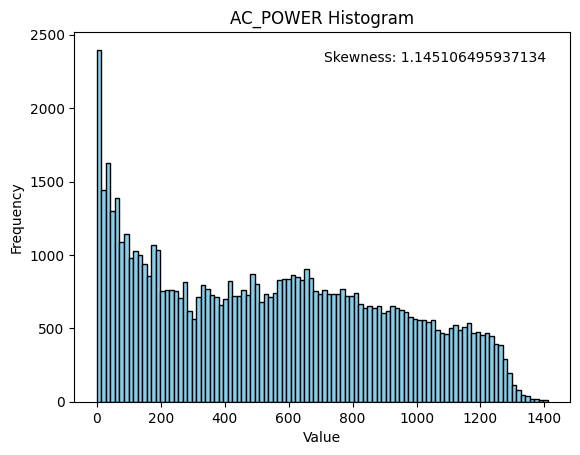

In [25]:
# Filtering values smaller than the lower limit
df_filtered = df[df['AC_POWER'] != 0.0]

# Calculating the skewness coefficient
skewness = df['AC_POWER'].skew()

# Plotting the histogram
plt.hist(df_filtered['AC_POWER'], bins=100, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('AC_POWER Histogram')

# Adding text with the value of the skewness coefficient
plt.text(0.95, 0.95, f'Skewness: {skewness}', ha='right', va='top', transform=plt.gca().transAxes)

# Displaying the histogram
plt.show()

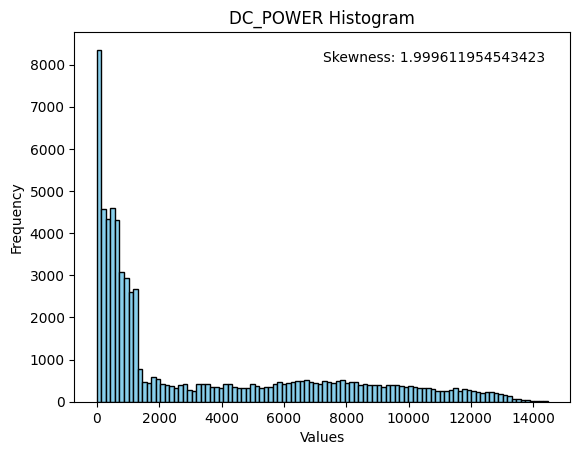

In [26]:
# Filtering values smaller than the lower limit
df_filtered = df[df['DC_POWER'] != 0.0]

# Calculating the skewness coefficient
skewness = df['DC_POWER'].skew()

# Plotting the histogram
plt.hist(df_filtered['DC_POWER'], bins=100, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('DC_POWER Histogram')

# Adding text with the value of the skewness coefficient
plt.text(0.95, 0.95, f'Skewness: {skewness}', ha='right', va='top', transform=plt.gca().transAxes)

# Displaying the histogram
plt.show()

### Total Yield Sum by Date Graph

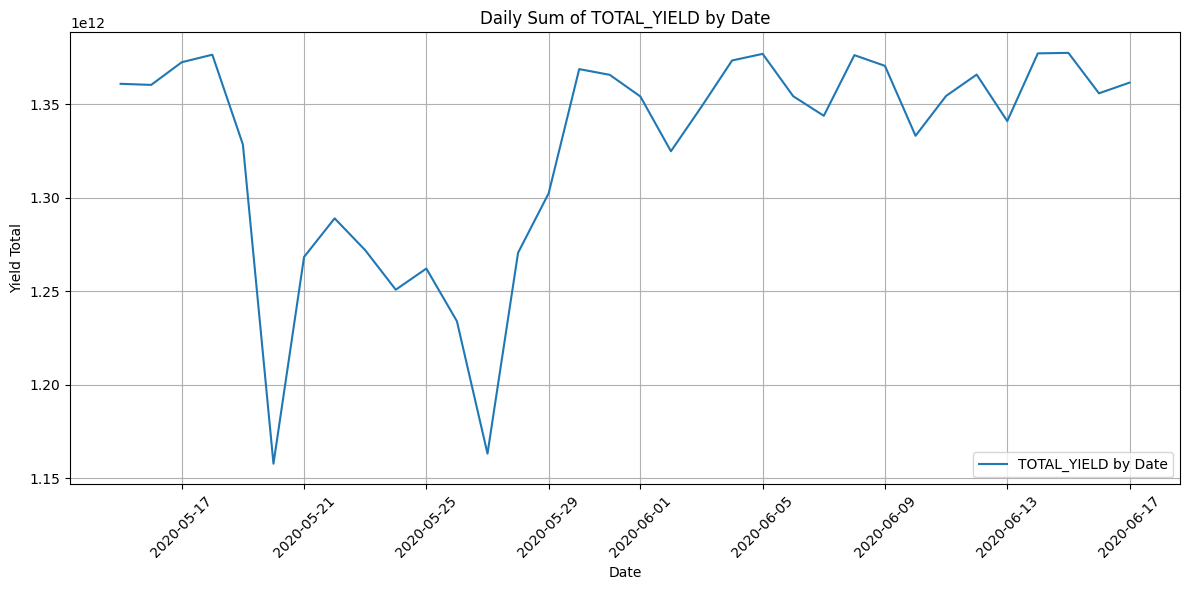

In [27]:
# Grouping by 'DATE' and summing 'TOTAL_YIELD'
daily_yield = df.groupby('DATE')['TOTAL_YIELD'].sum().reset_index()

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(daily_yield['DATE'], daily_yield['TOTAL_YIELD'], label='TOTAL_YIELD by Date')
plt.xlabel('Date')
plt.ylabel('Yield Total')
plt.title('Daily Sum of TOTAL_YIELD by Date')
plt.legend()
plt.grid(True)
# Rotating dates on the X axis for better visualization
plt.xticks(rotation=45)
# Adjusting layout to avoid overlap
plt.tight_layout()
plt.show()

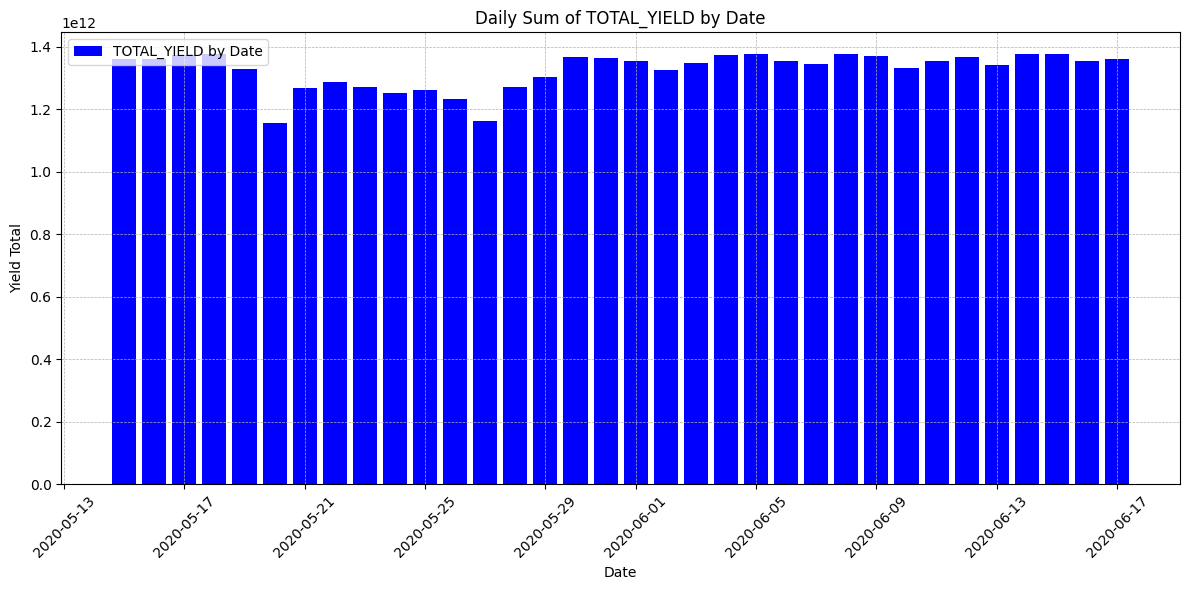

In [28]:
# Plotting the graph
plt.figure(figsize=(12, 6))
plt.bar(daily_yield['DATE'], daily_yield['TOTAL_YIELD'], color='blue', label='TOTAL_YIELD by Date')
plt.xlabel('Date')
plt.ylabel('Yield Total')
plt.title('Daily Sum of TOTAL_YIELD by Date')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Rotating dates on the X axis for better visualization
plt.xticks(rotation=45)
# Adjusting layout to avoid overlap
plt.tight_layout()
plt.show()

# Task 2 - Probability (Discrete)

What is the probability of rolling exactly two 6s in five rolls of a fair die?

In [29]:
# Parameters of the binomial distribution
# total number of trials (dice rolls)
n = 5
# probability of a single success (probability of rolling a 6 on a fair die)
p = 1/6

# Calculating the probability of X=2
# number of successes (number of 6s)
k = 2 
probability = binom.pmf(k, n, p)

# Printing the result
print(f"The probability of rolling exactly two 6s in five rolls of a fair die is: {probability:.4f} or {probability*100:.2f}%.")

The probability of rolling exactly two 6s in five rolls of a fair die is: 0.1608 or 16.08%.


### Binomial Distribution: Grafic of Probability of X successes in 5 rolls of a fair die

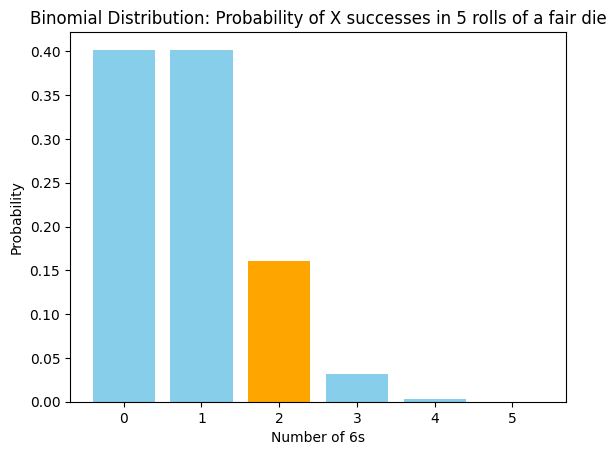

In [30]:
# Creating a graphical representation of the binomial distribution
x = np.arange(0, n+1)
probability = binom.pmf(x, n, p)

# Setting colors for each bar
colors = ['skyblue'] * (n + 1)

# Changing the color of the bar for k=2 to orange
colors[k] = 'orange' 

plt.bar(x, probability, color=colors)
plt.xlabel('Number of 6s')
plt.ylabel('Probability')
plt.title('Binomial Distribution: Probability of X successes in 5 rolls of a fair die')
plt.show()

The number of industrial injuries on average per working week in a factory is 0.75. Assuming that the distribution of injuries follows a Poisson distribution, find the probability that in a particular week there will be no more than two accidents.

In [31]:
# The number of events
k = 2

# lambda values
v_lambda = 0.75

# Calculating probabilities for each lambda value
probability = (np.exp(-v_lambda) * v_lambda**2) / np.math.factorial(2)

# Printing the result
print(f"The probability that in a specific week there are no more than two accidents is {probability:.4f} or {probability*100:.2f}%.")

The probability that in a specific week there are no more than two accidents is 0.1329 or 13.29%.


### Grafic of Probability of Number of Accidents in a Specific Week

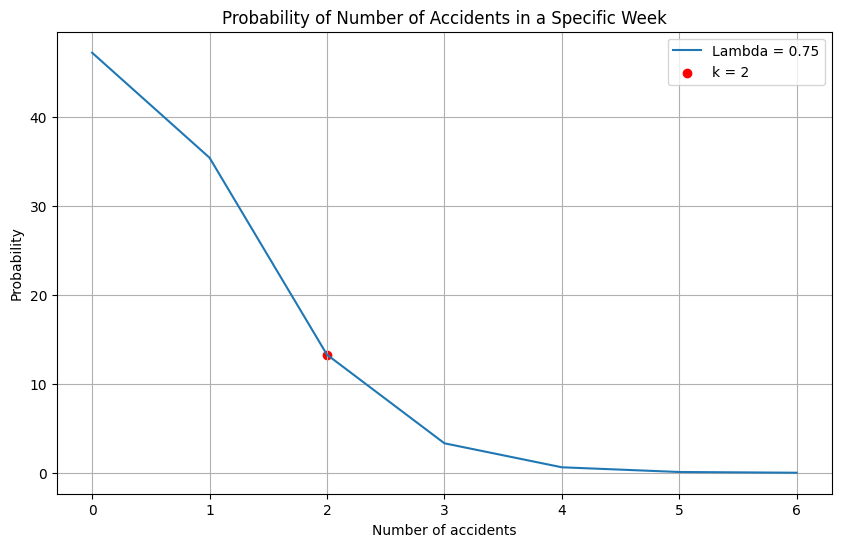

In [32]:
# Desired lambda value
lambda_desired = 0.75

# Number of events (number of accidents)
# Considering up to 6 accidents for visualization
k_values = np.arange(0, 7)

# Initializing the probability matrix
probabilities = np.zeros(len(k_values))

# Calculating probabilities for lambda = 0.75 and each value of k
for i, k in enumerate(k_values):
    probabilities[i] = 100*(np.exp(-lambda_desired) * lambda_desired**k) / np.math.factorial(k)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, probabilities, label=f'Lambda = {lambda_desired}')
plt.scatter(2, probabilities[2], color='red', label='k = 2')
plt.xlabel('Number of accidents')
plt.ylabel('Probability')
plt.title('Probability of Number of Accidents in a Specific Week')
plt.grid(True)
plt.legend()
plt.show()

# Task 3 - Probability (Continuous)

The time a person spends at Dublin Zoo is Normally distributed with a mean of 90 minutes and a standard deviation of 10 minutes.

Using this distribution, answer the following:

### 1 - If a visitor is selected at random, find the probability that they will spend at most 85 minutes visiting the zoo.e zoo. zoo.

In [33]:
# Mean and Standard Deviation values
mu = 90
sigma = 10

In [34]:
# Value to find the probability (85 minutes)
x = 85

# Calculating the Z-score
z_score = (x - mu) / sigma

# Using the Cumulative Distribution Function (CDF)
# to find the probability
probability = norm.cdf(z_score)

# Printing the result
print(f'The probability of a visitor spending at most 85 minutes at the zoo is at most {probability:.4f} or {probability*100:.2f}%.')

The probability of a visitor spending at most 85 minutes at the zoo is at most 0.3085 or 30.85%.


### 2 - If a visitor is selected at random, find the probability that they will spend at least 100 minutes visiting the zoo.

In [35]:
# Value to find the probability (100 minutes)
x = 100

# Calculating the Z-score

z_score = (x - mu) / sigma

# Using the Cumulative Distribution Function (CDF) 
# to find the probability of spending less than 100 minutes
probability_less_than_100 = norm.cdf(z_score)

# Calculating the probability of spending at least 100 minutes
probability_at_least_100 = 1 - probability_less_than_100

# Printing the result
print(f'The probability of a visitor spending at least 100 minutes at the zoo is approximately {probability_at_least_100:.4f} or {probability_at_least_100*100:.2f}%.')

The probability of a visitor spending at least 100 minutes at the zoo is approximately 0.1587 or 15.87%.


### 3 - Given that you know that a particular visitor has spent longer than average visiting the Zoo, what is the probability that they have spent more than 100 minutes there?

In [36]:
# Value to find the probability more then 100 minutes (100.1 minutes)
x = 100.1

# Calculating the Z-score
z_score = (x - mu) / sigma

# Using the Cumulative Distribution Function (CDF)
# to find the probability of spending less than 100 minutes
probability_less_than_100 = norm.cdf(z_score)

# Calculating the probability of spending at least 100 minutes
probability_at_least_100 = 1 - probability_less_than_100

# Printing the result
print(f'The probability of a visitor spending more than 100 minutes at the zoo is approximately {probability_at_least_100:.4f} or {probability_at_least_100*100:.2f}%.')

The probability of a visitor spending more than 100 minutes at the zoo is approximately 0.1562 or 15.62%.


### Grafic of the time a person spends at Dublin Zoo

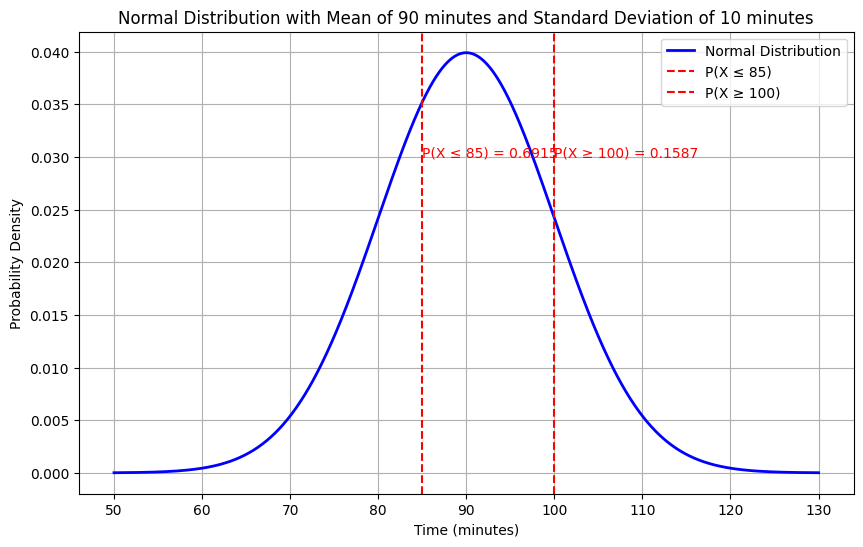

In [37]:
# Values for the x-axis
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Normal distribution
pdf = norm.pdf(x, mu, sigma)

# Interest probabilities
x_values = [85, 100]
probabilities = [1 - norm.cdf((x_val - mu) / sigma) for x_val in x_values]
probability_labels = ['P(X ≤ 85)', 'P(X ≥ 100)']

# Plotting the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', linewidth=2, label='Normal Distribution')

# Adding vertical lines for the points of interest
for i, x_val in enumerate(x_values):
    plt.axvline(x_val, color='r', linestyle='--', label=probability_labels[i])

# Adding probabilities above the vertical lines
for i, x_val in enumerate(x_values):
    plt.text(x_val, 0.03, f'{probability_labels[i]} = {probabilities[i]:.4f}', color='r', fontsize=10)

# Additional plot settings
plt.xlabel('Time (minutes)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution with Mean of 90 minutes and Standard Deviation of 10 minutes')
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()